In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
df = pd.read_csv("result.csv", index_col=False, header=None)
df.columns = ["method", "vectors", "acc", "pre", "rec", "f1s"]
dvals = {'HCB':'HC(Binary)', 'HCN':'HC(Norm)', 
         'HCBCX':'HC(Binary)+CX(Norm)', 'HCNCX':'HC(Norm)+CX(Norm)'}

def draw_plot(df, val_y1, val_y2, filename):
    list_y1 = df.loc[df['vectors'] == val_y1]["f1s"].tolist()
    list_y2 = df.loc[df['vectors'] == val_y2]["f1s"].tolist()
    x = np.asarray([i for i in range(10)])
    x = df.loc[df['vectors'] == val_y1]["method"].tolist()
    y = np.asarray([list_y1,list_y2])
    #plt.plot(x, y.T)
    leg1, = plt.plot(x, list_y1)
    leg2, = plt.plot(x, list_y2)
    plt.legend([leg1, leg2], [dvals[val_y1], dvals[val_y2]])
    plt.xlabel('Name of Method')
    plt.ylabel('F1-Score (%)')
    plt.xticks(rotation=45)
    plt.yticks(np.arange(50, 101, 10))
    plt.gcf().subplots_adjust(bottom=0.25, top=0.8)
    plt.savefig(filename, dpi=600)
    plt.show()

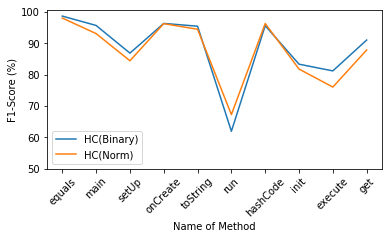

In [3]:
# (a) Method-only features.
draw_plot(df, "HCB", "HCN", "hc_wocx.jpg")

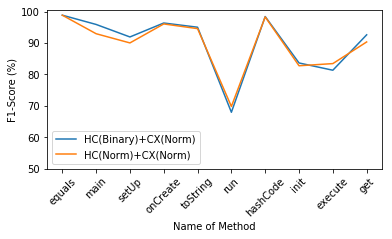

In [4]:
# (b) Method+Complexity features.
draw_plot(df, "HCBCX", "HCNCX", "hc_wcx.jpg")